# 1 Sleep well

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import zero_one_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.exceptions import ConvergenceWarning
from sklearn.utils._testing import ignore_warnings

1.1 Data understanding and preprocessing

In [16]:
# Load the training data
X_train = np.loadtxt('X_train.csv', delimiter=',')
y_train = np.loadtxt('y_train.csv', delimiter=',')
X_test = np.loadtxt('X_test.csv', delimiter=',')
y_test = np.loadtxt('y_test.csv', delimiter=',')

# Report the class frequencies
print('Class frequencies:')
for i in range(5):
    print('Class %d: %f' % (i, np.sum(y_train == i) / y_train.shape[0]))

Class frequencies:
Class 0: 0.520875
Class 1: 0.095511
Class 2: 0.252728
Class 3: 0.046940
Class 4: 0.083946


Plot

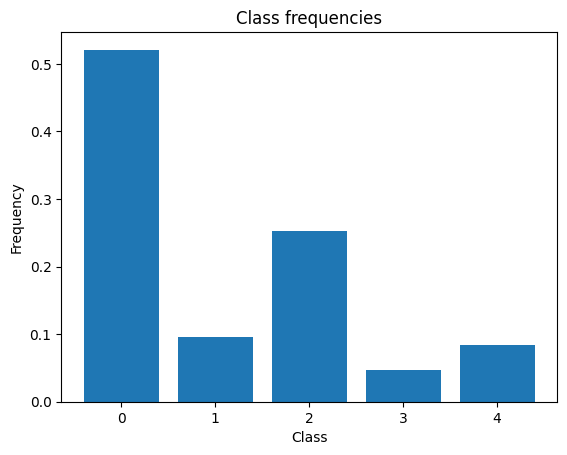

In [5]:
# Plot class frequencies (bar plot)
plt.bar(np.arange(5), [np.sum(y_train == i) / y_train.shape[0] for i in range(5)])
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class frequencies')
plt.show()

### 1.2 Classification

1.2.1 Multinomial Logistic Regression

In [6]:

# Split the training data into training and validation data (80/20 split)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# Train softmax regression model
with ignore_warnings(category=ConvergenceWarning):
    softmax_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=0)
    softmax_model.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = softmax_model.predict(X_val)

# Report the zero-one loss
print('Zero-one loss training (softmax): %f' % zero_one_loss(y_val, y_pred))

# Predict on test data
y_pred_test = softmax_model.predict(X_test)

# Report the zero-one loss
print('Zero-one loss on test data (softmax): %f' % zero_one_loss(y_test, y_pred_test))

Zero-one loss training (softmax): 0.146182
Zero-one loss on test data (softmax): 0.098842


1.2.2 Random Forest

In [7]:
# Apply random forests with 50, 100, and 200 trees.
for n_estimators in [50, 100, 200]:
    # Train random forest classifier
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=0)
    rf_model.fit(X_train, y_train)

    # Make predictions on the training data
    y_pred_train = rf_model.predict(X_val)

    # Report the zero-one loss
    print('Zero-one loss on training data with %d trees: %f' % (n_estimators, zero_one_loss(y_val, y_pred_train)))

    # Make predictions on the test data
    y_pred_test = rf_model.predict(X_test)

    # Report the zero-one loss
    print('Zero-one loss on test data with %d trees: %f' % (n_estimators, zero_one_loss(y_test, y_pred_test)))

Zero-one loss on training data with 50 trees: 0.143662
Zero-one loss on test data with 50 trees: 0.112798
Zero-one loss on training data with 100 trees: 0.141142
Zero-one loss on test data with 100 trees: 0.110424
Zero-one loss on training data with 200 trees: 0.141586
Zero-one loss on test data with 200 trees: 0.110424


1.2.3 K-NN

In [ ]:
# Apply k-nearest-neighbor classification. Use cross-validation to determine
# the number of neighbors. Report training and test loss (in terms of 0-1 loss).
from sklearn.neighbors import KNeighborsClassifier

min_n = 1
min_loss = 1

# Train k-nearest-neighbor classifier
for n in range(1, 50):
    knn_model = KNeighborsClassifier(n_neighbors=n)
    knn_model.fit(X_train, y_train)

    # Make predictions on the training data
    y_pred_train = knn_model.predict(X_val)

    # Report the zero-one loss
    print('Zero-one loss on training data with %d neighbors: %f' % (n, zero_one_loss(y_val, y_pred_train)))

    # Find optimal number of neighbors on training set
    
    if zero_one_loss(y_val, y_pred_train) < min_loss:
        min_loss = zero_one_loss(y_val, y_pred_train)
        min_n = n


In [16]:
# Print optimal number of neighbors with lowest zero-one loss (including loss)
print('Optimal number of neighbors: %d' % min_n)
print('Lowest zero-one loss: %f' % min_loss)

Optimal number of neighbors: 25
Lowest zero-one loss: 0.139956


In [22]:
# Make predictions on the test data using the optimal number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=min_n)
knn_model.fit(X_train, y_train)
y_pred_test = knn_model.predict(X_test)

# Report the zero-one loss
print('Zero-one loss on test data with %d neighbors: %f' % (min_n, zero_one_loss(y_test, y_pred_test)))

Zero-one loss on test data with 25 neighbors: 0.102367


In [25]:
# Try a new K-NN classifier using 5-fold cross-validation and standardscaler
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Load the data again
X_train = np.loadtxt('X_train.csv', delimiter=',')
y_train = np.loadtxt('y_train.csv', delimiter=',')
X_test = np.loadtxt('X_test.csv', delimiter=',')
y_test = np.loadtxt('y_test.csv', delimiter=',')

# Split the training data into training and validation data (80/20 split)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

k_values = [n for n in range (1,200)]
scores = []

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_val = scaler.fit_transform(X_val)
# X_test = scaler.fit_transform(X_test)

for k in k_values:
    knn_cv = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    score = cross_val_score(knn_cv, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    scores.append(np.mean(score))

# Plot the cross-validation scores
plt.plot(k_values, scores)
plt.xlabel('Number of neighbors')
plt.ylabel('Cross-validation score')
plt.title('Cross-validation score for K-NN')
plt.show()

In [29]:
print(np.mean(X_train))

1.0337226130910683e-17


In [30]:
print(round(np.mean(X_train), 2))

0.0


In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Load the data again
X_train = np.loadtxt('X_train.csv', delimiter=',')
y_train = np.loadtxt('y_train.csv', delimiter=',')
X_test = np.loadtxt('X_test.csv', delimiter=',')
y_test = np.loadtxt('y_test.csv', delimiter=',')

# Define the parameter grid
param_grid = {'n_neighbors': np.arange(160, 175)}

# Define the grid search
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search
grid.fit(X_train, y_train)

# Print the optimal number of neighbors and the corresponding score
print('Optimal number of neighbors: %d' % grid.best_params_['n_neighbors'])
print('Lowest zero-one loss: %f' % grid.best_score_)

Optimal number of neighbors: 173
Lowest zero-one loss: 0.840737


In [ ]:
# Print the zero-one loss on the test data using the optimal number of neighbors
y_pred_test = grid.predict(X_test)

In [24]:
# Find optimal number of neighbors on training set
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Make predictions on the validation data using the optimal number of neighbors
y_pred_val = knn.predict(X_val)

# Report the zero-one loss
print('Zero-one loss on validation data with %d neighbors: %f' % (best_k, zero_one_loss(y_val, y_pred_val)))

# Make predictions on the test data using the optimal number of neighbors

Zero-one loss on validation data with 70 neighbors: 0.142476
